# FIFA19 DATA ANALYSIS AND VISUALISATION
FIFA 19 is a football simulation video game developed by EA Vancouver as part of Electronic Arts' FIFA series. It is the 26th installment in the FIFA series, and was released on 28 September 2018 for PlayStation 3, PlayStation 4, Xbox 360, Xbox One, Nintendo Switch, and Microsoft Windows.
<img src = "https://i.pinimg.com/736x/91/40/70/914070f8ce29edb306945b507b5c68be.jpg">


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/fifa19/data.csv


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
players = pd.read_csv("/kaggle/input/fifa19/data.csv")

 # Column Description
#### ID - unique ID of every player.
#### Name - name of player.
#### Age - age of player.
#### Nationality - nationality of player.
#### Overall - overall rating of player.
#### Club - current club of player.
#### .
#### .
#### .
#### and so on...
 
 

# Analysis

In [4]:
players[['ID', 'Name']]

,ID,Name
0,158023,L. Messi
1,20801,Cristiano Ronaldo
2,190871,Neymar Jr
3,193080,De Gea
4,192985,K. De Bruyne
...,...,...
18202,238813,J. Lundstram
18203,243165,N. Christoffersson
18204,241638,B. Worman
18205,246268,D. Walker-Rice


In [5]:
players[['Name', 'Preferred Foot']]

,Name,Preferred Foot
0,L. Messi,Left
1,Cristiano Ronaldo,Right
2,Neymar Jr,Right
3,De Gea,Right
4,K. De Bruyne,Right
...,...,...
18202,J. Lundstram,Right
18203,N. Christoffersson,Right
18204,B. Worman,Right
18205,D. Walker-Rice,Right


# Data Cleaning

In [6]:
players.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

In [7]:
# filling the missing value for the continous variables for proper data visualization

players['ShortPassing'].fillna(players['ShortPassing'].median(), inplace = True)
players['Dribbling'].fillna(players['Dribbling'].median(), inplace = True)
players['FKAccuracy'].fillna(players['FKAccuracy'], inplace = True)
players['LongPassing'].fillna(players['LongPassing'].median(), inplace = True)
players['BallControl'].fillna(players['BallControl'].median(), inplace = True)
players['HeadingAccuracy'].fillna(players['HeadingAccuracy'].median(), inplace = True)
players['Finishing'].fillna(players['Finishing'].median(), inplace = True)
players['Crossing'].fillna(players['Crossing'].median(), inplace = True)
players['Weight'].fillna('200lbs', inplace = True)
players['Height'].fillna("5'11", inplace = True)
players['Joined'].fillna('Jul 1, 2018', inplace = True)
players['Jersey Number'].fillna(8, inplace = True)
players['Position'].fillna('ST', inplace = True)
players['Club'].fillna('No Club', inplace = True)
players['Work Rate'].fillna('Medium/ Medium', inplace = True)
players['Skill Moves'].fillna(players['Skill Moves'].median(), inplace = True)
players['Preferred Foot'].fillna('Right', inplace = True)
players['International Reputation'].fillna(1, inplace = True)
players['Wage'].fillna('€400K', inplace = True)
players.fillna(0, inplace = True)

In [8]:
# adding these details
players.loc[0, 'Defending'] = 22
players.loc[1, 'Defending'] = 24


# Renaming Columns

In [9]:
players.rename({
    'Preferred Foot' : 'preferred_foot',
    'Weak Foot' : 'weak_foot',
    'Skill Moves' : 'skill_moves',
    'Overall' : 'Rating',
    'HeadingAccuracy' : 'Heading',
    'Jersey Number' : 'jersey_number',
    'Work Rate' : 'work_rate',
    'International Reputation' : 'international_reputation',
    'Loaned From' : 'loaned_from',
    'Contract Valid Until' : 'contract_valid_until',
    'Club Logo' : 'club_logo'},
    axis=1, inplace = True)

# Foot Preference Visualisation


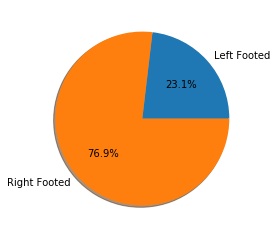

In [10]:
foot_count = []
foot = ['Left Footed', 'Right Footed']
foot_count.append((players.preferred_foot == 'Left').sum())
foot_count.append((players.preferred_foot == 'Right').sum())
plt.pie(foot_count, labels = foot, shadow = True, autopct = '%1.1f%%')
plt.show()
    

# Messi And Ronaldo Analysis

In [11]:

def chart(ID):
    features = np.array([ 'Finishing', 'BallControl', 'Rating', 'Defending', 'Acceleration', 'Dribbling', 'FKAccuracy', 'Heading'])
    details = players.loc[ID, features].values
    
    angles = np.linspace(0, 2*np.pi, len(features), endpoint=False)
    stats = np.concatenate((details,[details[0]]))
    angles = np.concatenate((angles,[angles[0]]))
    
    fig= plt.figure(figsize = (10,10))
    ax = fig.add_subplot(111, polar=True)
    ax.plot(angles, stats, 'o-', linewidth=2)
    ax.fill(angles, stats, color = 'g', alpha=0.30)
    ax.set_thetagrids(angles * 180/np.pi, features, size = 15)
    ax.set_title(players.Name[ID], size = 50)
    ax.grid(True)
    
    return plt.show()
    

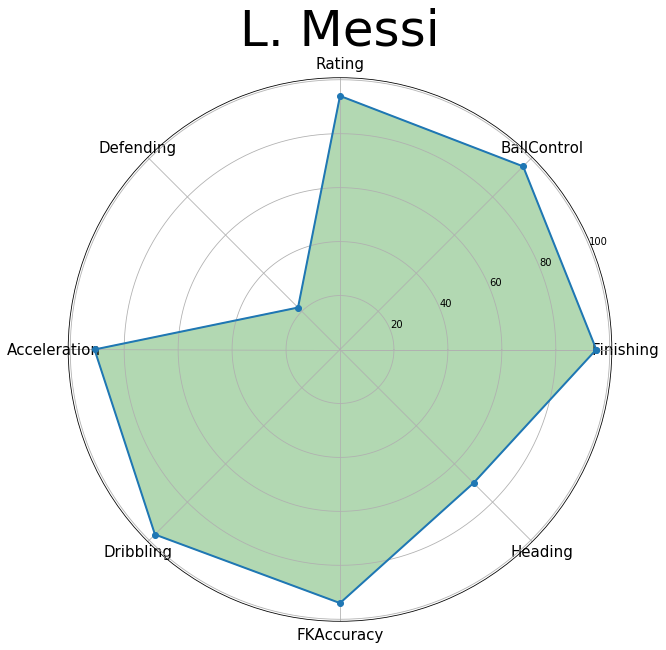

In [12]:
chart(0)

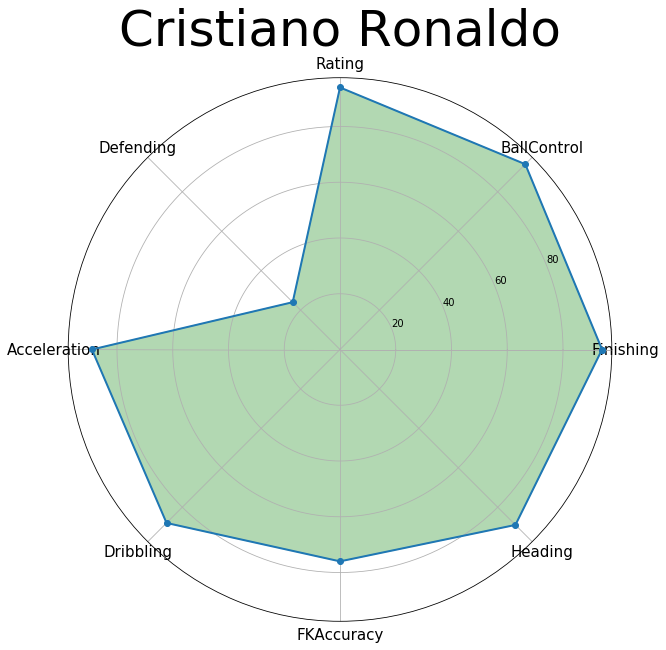

In [13]:
chart(1)

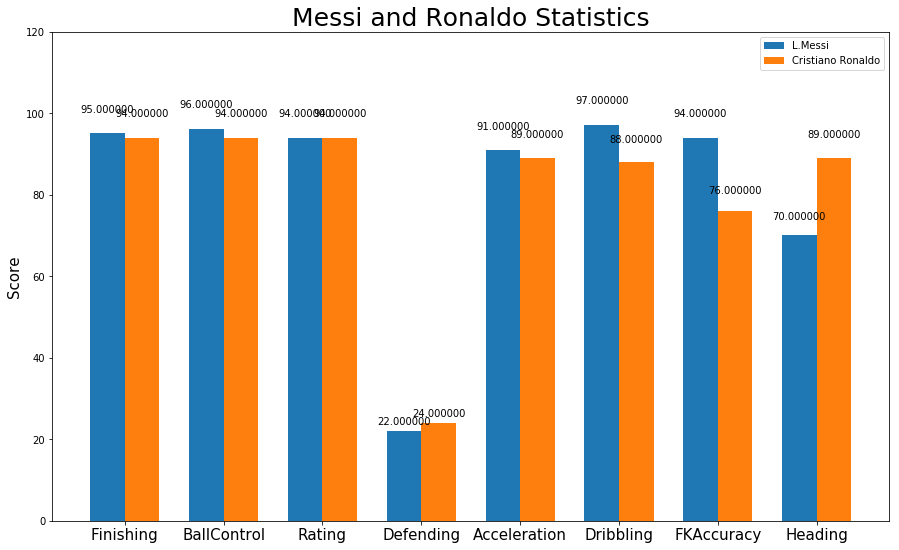

In [14]:
features = np.array([ 'Finishing', 'BallControl', 'Rating', 'Defending', 'Acceleration', 'Dribbling', 'FKAccuracy', 'Heading'])
messi = players.loc[0, features].values
ronaldo = players.loc[1, features].values
Score = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
x = np.arange(len(features))
width = 0.35

fig, ax = plt.subplots(figsize = (15,9))
rect1 = ax.bar(x - width/2, messi, width, label= 'L.Messi')
rect2 = ax.bar(x + width/2, ronaldo, width, label= 'Cristiano Ronaldo')
ax.set_xticks(x)
ax.set_xticklabels(features, size = 15)
ax.set_ylabel('Score', size = 15)
plt.title('Messi and Ronaldo Statistics', size = 25)
plt.ylim(0,120)
ax.legend()

#display height of bar
def height(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%f' % float(height),
        ha='center', va='bottom')
height(rect1)
height(rect2)
plt.show()